In [126]:
import numpy as np
from numpy import asarray
import pandas as pd
import os
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from tensorflow.keras import layers, models, activations
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard


In [127]:
np.random.seed(30)
normal_data = pd.read_csv(os.getcwd() + '/Data/brain_tumour_normalized.csv')
normal_data.head()

,Image,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness,Class
0,Image1,0.194705,0.212023,0.443074,0.274801,0.068211,0.010937,0.028236,0.475410,0.246092,0.603108,0.139694,0.981764,0.0,0
1,Image2,0.261489,0.276124,0.510114,0.674843,0.052278,0.007693,0.017951,0.797096,0.648383,0.773800,0.093527,0.997417,0.0,0
2,Image3,0.219003,0.392326,0.614200,0.001487,0.090618,0.016478,0.023280,0.012719,0.001173,0.230760,0.195261,0.972855,0.0,1
3,Image4,0.177300,0.329007,0.559750,0.001513,0.108202,0.021559,0.043805,0.012908,0.001192,0.196137,0.258588,0.941475,0.0,1
4,Image5,0.218223,0.249840,0.483677,0.370574,0.068403,0.011067,0.050836,0.564860,0.338854,0.560862,0.226679,0.960995,0.0,0


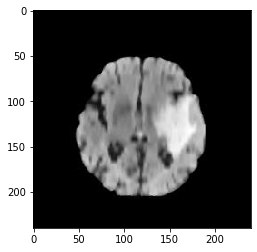

(240, 240, 2)

In [128]:
import PIL
from PIL import Image, ImageOps
# Open the image form working directory
image = Image.open(os.getcwd() + '/Data/Images/Image3.jpg').convert("LA")
plt.imshow(image)
plt.show()
np.array(image).shape

In [129]:
#converting all images into numpy arrays and storing them into a list
img_list = []
for i in range(1, len(normal_data)+1):
    image = Image.open(os.getcwd() + '/Data/Images/Image'+str(i)+'.jpg').convert("LA")
    #converting to grayscale
    data = asarray(image).astype("float32")
    img_list.append(data)
X = np.array(img_list)
X.shape

(3762, 240, 240, 2)

In [130]:
Y_reshaped = normal_data["Class"].values.reshape(-1,1)
Y_reshaped

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [131]:
encoder = OneHotEncoder(sparse=False)
# transform data
onehot_Y = encoder.fit_transform(Y_reshaped)
onehot_Y

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [132]:
#storing image data as well as class in a dataframe
# images = pd.DataFrame()
# images["Image"] = normal_data["Image"]
# images["Array"] = img_list
# images["Class"] = normal_data["Class"]
# images.head()
# normal_data["Class"].values.shape

In [133]:
# images["Array"].values.shape

In [134]:
#dataset split
X_train, X_test, Y_train, Y_test = train_test_split(X, onehot_Y, test_size = 0.2, random_state = 1)
# X_train.head

In [135]:
X_train.shape

(3009, 240, 240, 2)

## CNN Model 1

In [136]:
#normalizing the data
X_train = X_train / 255.0
X_test = X_test / 255.0

In [137]:
#creating cnn
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(240, 240, 2)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(2, activation='softmax')
])

In [138]:
cnn.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [139]:
checkpointer = ModelCheckpoint(filepath = "cnn(1).h5", verbose=0, save_best_only=True)
callbacks_list = [checkpointer]

In [140]:
History = cnn.fit(X_train, Y_train, epochs = 50, batch_size = 64, validation_data=(X_test, Y_test), callbacks = callbacks_list)

Epoch 1/50
48/48 [==============================] - 170s 4s/step - loss: 1.1720 - accuracy: 0.5450 - val_loss: 0.5541 - val_accuracy: 0.6627
Epoch 2/50
48/48 [==============================] - 169s 4s/step - loss: 0.4953 - accuracy: 0.7627 - val_loss: 0.4206 - val_accuracy: 0.8194
Epoch 3/50
48/48 [==============================] - 173s 4s/step - loss: 0.3831 - accuracy: 0.8332 - val_loss: 0.3257 - val_accuracy: 0.8712
Epoch 4/50
48/48 [==============================] - 173s 4s/step - loss: 0.3388 - accuracy: 0.8491 - val_loss: 0.6337 - val_accuracy: 0.6746
Epoch 5/50
48/48 [==============================] - 169s 4s/step - loss: 0.3546 - accuracy: 0.8531 - val_loss: 0.2761 - val_accuracy: 0.8884
Epoch 6/50
48/48 [==============================] - 198s 4s/step - loss: 0.2639 - accuracy: 0.8893 - val_loss: 0.3092 - val_accuracy: 0.8632
Epoch 7/50
48/48 [==============================] - 201s 4s/step - loss: 0.2325 - accuracy: 0.9063 - val_loss: 0.1912 - val_accuracy: 0.9243
Epoch 8/50
48

In [141]:
cnn.fit(X_train, Y_train, epochs = 10)

Epoch 1/10
95/95 [==============================] - 161s 2s/step - loss: 9.1658e-04 - accuracy: 1.0000
Epoch 2/10
95/95 [==============================] - 161s 2s/step - loss: 0.0018 - accuracy: 0.9997
Epoch 3/10
95/95 [==============================] - 162s 2s/step - loss: 0.0956 - accuracy: 0.9634
Epoch 4/10
95/95 [==============================] - 163s 2s/step - loss: 0.0342 - accuracy: 0.9870
Epoch 5/10
95/95 [==============================] - 163s 2s/step - loss: 0.0254 - accuracy: 0.9904
Epoch 6/10
95/95 [==============================] - 162s 2s/step - loss: 0.0155 - accuracy: 0.9953
Epoch 7/10
95/95 [==============================] - 162s 2s/step - loss: 0.0075 - accuracy: 0.9980
Epoch 8/10
95/95 [==============================] - 162s 2s/step - loss: 0.0016 - accuracy: 1.0000
Epoch 9/10
95/95 [==============================] - 163s 2s/step - loss: 6.7362e-04 - accuracy: 1.0000
Epoch 10/10
95/95 [==============================] - 163s 2s/step - loss: 4.5019e-04 - accuracy: 1.00

In [142]:
#evaluating cnn model on test set
cnn.evaluate(X_test, Y_test)

24/24 [==============================] - 11s 459ms/step - loss: 0.2459 - accuracy: 0.9562


[0.2458810955286026, 0.9561753273010254]

In [143]:
#evaluating cnn model on train set
cnn.evaluate(X_train, Y_train)

95/95 [==============================] - 43s 452ms/step - loss: 3.5648e-04 - accuracy: 1.0000


[0.00035648184712044895, 1.0]

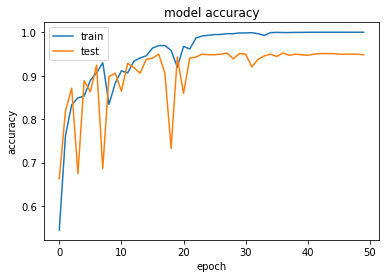

In [144]:
# summarize history for accuracy
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

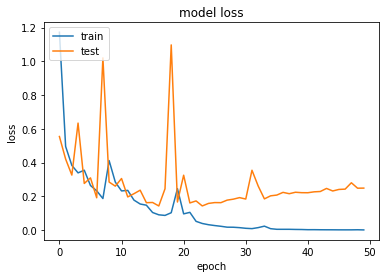

In [145]:
# summarize history for loss
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [146]:
#evaluating cnn model on test set
cnn.evaluate(X_test, Y_test)

24/24 [==============================] - 10s 435ms/step - loss: 0.2459 - accuracy: 0.9562


[0.2458810955286026, 0.9561753273010254]

In [147]:
#evaluating cnn model on train set
cnn.evaluate(X_train, Y_train)

95/95 [==============================] - 42s 447ms/step - loss: 3.5648e-04 - accuracy: 1.0000


[0.00035648184712044895, 1.0]

In [148]:
from tensorflow import keras
cnn_1 = keras.models.load_model('cnn(1).h5')

In [149]:
cnn_1.evaluate(X_test, Y_test)

24/24 [==============================] - 10s 429ms/step - loss: 0.1427 - accuracy: 0.9495


[0.1427360475063324, 0.9495351910591125]

In [150]:
cnn_1.evaluate(X_train, Y_train)

95/95 [==============================] - 43s 456ms/step - loss: 0.0656 - accuracy: 0.9811


[0.06563934683799744, 0.981056809425354]

In [151]:
pred = cnn_1.predict(X_test)
pred = [np.argmax(ele) for ele in pred]
Y_p = [np.argmax(ele) for ele in Y_test]
Y_p

[0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,


In [152]:
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(Y_p, pred)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Confusion Matrix : 
 [[424  15]
 [ 23 291]]
Accuracy :  0.949535192563081
Sensitivity :  0.9658314350797267
Specificity :  0.9267515923566879


In [153]:
cnn_1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 238, 238, 32)      608       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 119, 119, 32)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 117, 117, 64)      18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 58, 58, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 215296)            0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                13779008  
_________________________________________________________________
dense_10 (Dense)             (None, 2)                

In [154]:
# #saving model
# cnn.save('cnn.h5')
# print("Saved model to disk")

## CNN Model 2 (with 3 layers and dropout Regularization)

In [155]:
#creating cnn
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(240, 240, 2)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(2, activation='softmax')   
])

In [156]:
cnn.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [157]:
checkpointer = ModelCheckpoint(filepath = "cnn(2).h5", verbose=0, save_best_only=True)
callbacks_list = [checkpointer]

In [158]:
History = cnn.fit(X_train, Y_train, epochs = 50, batch_size = 64, validation_data=(X_test, Y_test), callbacks = callbacks_list)

Epoch 1/50
48/48 [==============================] - 198s 4s/step - loss: 0.6348 - accuracy: 0.6288 - val_loss: 0.4342 - val_accuracy: 0.8141
Epoch 2/50
48/48 [==============================] - 197s 4s/step - loss: 0.4707 - accuracy: 0.7936 - val_loss: 0.3631 - val_accuracy: 0.8619
Epoch 3/50
48/48 [==============================] - 196s 4s/step - loss: 0.4398 - accuracy: 0.8149 - val_loss: 0.3440 - val_accuracy: 0.8606
Epoch 4/50
48/48 [==============================] - 198s 4s/step - loss: 0.4020 - accuracy: 0.8305 - val_loss: 0.3203 - val_accuracy: 0.8699
Epoch 5/50
48/48 [==============================] - 198s 4s/step - loss: 0.3513 - accuracy: 0.8564 - val_loss: 0.2687 - val_accuracy: 0.9004
Epoch 6/50
48/48 [==============================] - 195s 4s/step - loss: 0.3150 - accuracy: 0.8804 - val_loss: 0.2408 - val_accuracy: 0.9124
Epoch 7/50
48/48 [==============================] - 197s 4s/step - loss: 0.2821 - accuracy: 0.8847 - val_loss: 0.2261 - val_accuracy: 0.9017
Epoch 8/50
48

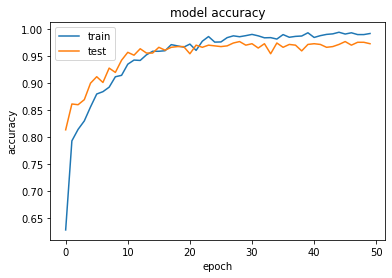

In [159]:
# summarize history for accuracy
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

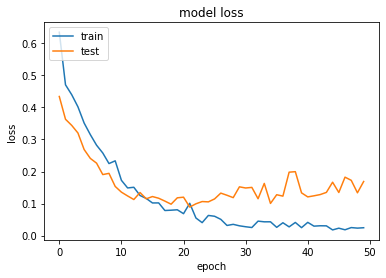

In [160]:
# summarize history for loss
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [161]:
#evaluating cnn model on test set
cnn.evaluate(X_test, Y_test)

24/24 [==============================] - 12s 501ms/step - loss: 0.1688 - accuracy: 0.9734


[0.16883130371570587, 0.9734395742416382]

In [162]:
#evaluating cnn model on train set
cnn.evaluate(X_train, Y_train)

95/95 [==============================] - 51s 537ms/step - loss: 0.0016 - accuracy: 1.0000


[0.0015786885051056743, 1.0]

In [163]:
from tensorflow import keras
cnn_2 = keras.models.load_model('cnn(2).h5')

In [164]:
cnn_2.evaluate(X_test, Y_test)

24/24 [==============================] - 12s 507ms/step - loss: 0.0890 - accuracy: 0.9708


[0.08896709978580475, 0.970783531665802]

In [165]:
cnn_2.evaluate(X_train, Y_train)

95/95 [==============================] - 51s 533ms/step - loss: 0.0155 - accuracy: 0.9967


[0.015478869900107384, 0.9966766238212585]

In [166]:
cnn_2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 238, 238, 32)      608       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 119, 119, 32)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 117, 117, 64)      18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 58, 58, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 56, 56, 64)        36928     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 50176)            

In [167]:
pred_2 = cnn_2.predict(X_test)
pred_2 = [np.argmax(ele) for ele in pred_2]
pred_2

[0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,


In [168]:
Y_test

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [169]:
Y_p_2 = [np.argmax(ele) for ele in Y_test]
Y_p_2

[0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,


In [170]:
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(Y_p, pred)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Confusion Matrix : 
 [[424  15]
 [ 23 291]]
Accuracy :  0.949535192563081
Sensitivity :  0.9658314350797267
Specificity :  0.9267515923566879


## CNN Model 3(With Batch Normalization)

In [185]:
#creating cnn
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), input_shape=(240, 240, 2)),
    layers.BatchNormalization(),
    layers.Activation(activations.relu),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3)),
    layers.BatchNormalization(),
    layers.Activation(activations.relu),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3)),
    layers.BatchNormalization(),
    layers.Activation(activations.relu),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(2, activation='softmax')   
])

In [186]:
cnn.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [187]:
checkpointer = ModelCheckpoint(filepath = "cnn(3).h5", verbose=0, save_best_only=True)
callbacks_list = [checkpointer]

In [188]:
History = cnn.fit(X_train, Y_train, epochs = 50, batch_size = 64, validation_data=(X_test, Y_test), callbacks = callbacks_list)

Epoch 1/50
48/48 [==============================] - 486s 10s/step - loss: 2.0786 - accuracy: 0.5975 - val_loss: 0.6956 - val_accuracy: 0.4170
Epoch 2/50
48/48 [==============================] - 489s 10s/step - loss: 0.6404 - accuracy: 0.5846 - val_loss: 0.6635 - val_accuracy: 0.5445
Epoch 3/50
48/48 [==============================] - 575s 12s/step - loss: 0.6137 - accuracy: 0.6128 - val_loss: 0.6968 - val_accuracy: 0.4170
Epoch 4/50
48/48 [==============================] - 510s 11s/step - loss: 0.6336 - accuracy: 0.5842 - val_loss: 0.6961 - val_accuracy: 0.4170
Epoch 5/50
48/48 [==============================] - 470s 10s/step - loss: 0.6430 - accuracy: 0.5597 - val_loss: 0.6971 - val_accuracy: 0.4170
Epoch 6/50
48/48 [==============================] - 469s 10s/step - loss: 0.6306 - accuracy: 0.5862 - val_loss: 0.6975 - val_accuracy: 0.4170
Epoch 7/50
48/48 [==============================] - 553s 12s/step - loss: 0.6229 - accuracy: 0.6002 - val_loss: 0.6986 - val_accuracy: 0.4170
Epoch 

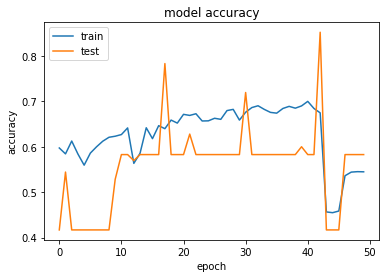

In [189]:
# summarize history for accuracy
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

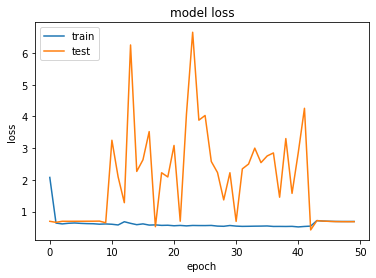

In [190]:
# summarize history for loss
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [191]:
#evaluating cnn model on test set
cnn.evaluate(X_test, Y_test)

24/24 [==============================] - 15s 610ms/step - loss: 0.6843 - accuracy: 0.5830


[0.6842975616455078, 0.5830013155937195]

In [192]:
#evaluating cnn model on train set
cnn.evaluate(X_train, Y_train)

95/95 [==============================] - 61s 643ms/step - loss: 0.6894 - accuracy: 0.5450


[0.6893628835678101, 0.5450315475463867]

In [193]:
from tensorflow import keras
cnn_3 = keras.models.load_model('cnn(3).h5')

In [194]:
cnn_3.evaluate(X_test, Y_test)

24/24 [==============================] - 15s 606ms/step - loss: 0.4245 - accuracy: 0.8526


[0.42447465658187866, 0.8525896668434143]

In [195]:
cnn_3.evaluate(X_train, Y_train)

95/95 [==============================] - 60s 635ms/step - loss: 0.4381 - accuracy: 0.8471


[0.4381440281867981, 0.8471252918243408]

In [196]:
pred_3 = cnn_3.predict(X_test)
pred_3 = [np.argmax(ele) for ele in pred_3]
Y_p_3 = [np.argmax(ele) for ele in Y_test]
Y_p_3

[0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,


In [197]:
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(Y_p, pred)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Confusion Matrix : 
 [[424  15]
 [ 23 291]]
Accuracy :  0.949535192563081
Sensitivity :  0.9658314350797267
Specificity :  0.9267515923566879


In [198]:
cnn_1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 238, 238, 32)      608       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 119, 119, 32)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 117, 117, 64)      18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 58, 58, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 215296)            0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                13779008  
_________________________________________________________________
dense_10 (Dense)             (None, 2)                